# 数据背景

我们获取了一些公司的员工数据。这些数据涵盖了所有在2011年1月24日至2015年12月13日期间加入公司的员工。对于每位员工，我们还知道截至2015年12月13日，他们是否仍在公司任职或已经离职。除此之外，我们还掌握了员工的一些一般信息，例如在公司任职期间的平均薪资、所属部门和工作年限等。

目标是预测员工的留存情况并理解其主要影响因素。具体而言，你需要：

1. 假设对于每个公司，其员工总数在2011年1月23日开始时为零。估算从2011年1月24日到2015年12月13日每一天的员工总数。
   - 例如，如果到2012年3月2日，公司1有2000人加入，而其中1000人已经离职，那么2012年3月2日公司1的员工总数应为1000。
2. 你需要创建一个包含三列的表格：日期（day）、员工总数（employee_headcount）和公司ID（company_id）。
3. 分析驱动员工流失的主要因素是什么？这些因素合理吗？请解释你的发现。
4. 如果你可以为这个数据集添加一个变量来帮助解释员工流失，你会选择什么变量？

表格名称为“employee_retention”，包含了关于员工的综合信息。

**列说明：**

- **employee_id**：员工的唯一标识符。在每个公司内，每位员工的ID是唯一的。
- **company_id**：公司ID。
- **dept**：员工所属的部门。
- **seniority**：员工在被聘用时的工作经验年数。
- **salary**：员工在公司任职期间的平均年薪。
- **join_date**：员工加入公司的日期，这个日期只能在2011年1月24日至2015年12月13日之间。
- **quit_date**：员工离职的日期（如果员工截至2015年12月13日仍在职，这一字段为NA）。

**示例**

让我们来看一下第一行员工的数据特征。

```plaintext
head(employee_retention, 1)
```

| 字段         | 值               | 描述                                                   |
|--------------|------------------|--------------------------------------------------------|
| employee_id  | 13201            | 员工的唯一标识符                                        |
| company_id   | 7                | 该员工在公司7工作                                      |
| dept         | customer_service | 该员工在客户服务部门工作                                |
| seniority    | 28               | 该员工在被公司7聘用时已有28年的工作经验                 |
| salary       | 89000            | 该员工的年薪为89,000美元                                 |
| join_date    | 2014-03-24       | 该员工于2014年3月24日加入公司7                          |
| quit_date    | 2015-10-30       | 该员工于2015年10月30日离职，即她在公司工作了大约19个月  |

# 数据集和库导入

导入常见的库：

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

导入需要的数据分析/机器学习库：

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

导入数据集：

In [3]:
original_data = pd.read_csv('./../dataset/03. employee_retention.csv')  # 从父文档的子文档中直接导入

查看一下前五行的内容：

In [4]:
original_data.head(n = 5)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


# 数据探索

首先查看一下数据集的信息：

In [5]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   employee_id  24702 non-null  float64
 1   company_id   24702 non-null  int64  
 2   dept         24702 non-null  object 
 3   seniority    24702 non-null  int64  
 4   salary       24702 non-null  float64
 5   join_date    24702 non-null  object 
 6   quit_date    13510 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ MB


从 `employee_retention` 数据集的导入信息可以看出，该数据集包含 24,702 条员工记录，每条记录包括员工的ID、公司ID、部门、工作经验年限、薪水、入职日期和离职日期，共计7个字段。其中，`employee_id` 和 `salary` 是 `float64` 类型，`company_id` 和 `seniority` 是 `int64` 类型，而 `dept`、`join_date` 和 `quit_date` 是字符串（`object`）类型。数据中没有缺失值的列有6个，只有 `quit_date` 列存在 13,510 个缺失值，这表示这些员工截至2015年12月13日仍在公司工作。

首先是填充缺失值，将所有的缺失值都填充为数据集的最新日期：

In [6]:
original_data['quit_date'].fillna('2015-12-13', inplace=True)

C:\Users\wangjun\AppData\Local\Temp\ipykernel_2892\106109016.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  original_data['quit_date'].fillna('2015-12-13', inplace=True)


然后将其转换为正确的格式：

In [7]:
original_data['join_date'] = pd.to_datetime(original_data['join_date'])
original_data['quit_date'] = pd.to_datetime(original_data['quit_date'])

接着我们添加一个变量，也就是员工的在职日期：

In [8]:
original_data['tenure_days'] = (original_data['quit_date'] - original_data['join_date']).dt.days

In [9]:
original_data['tenure_days']

0         585
1         340
2         426
3         389
4        1040
         ... 
24697     298
24698      48
24699     780
24700    1123
24701     864
Name: tenure_days, Length: 24702, dtype: int64

首先查看数据集中company的分布情况：

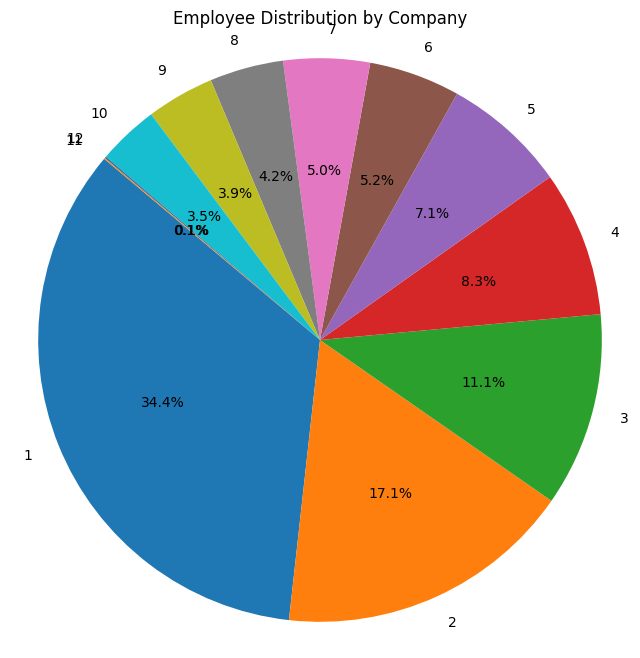

In [10]:
# 统计每个公司员工数量
company_counts = original_data['company_id'].value_counts()

# 首先设置图像的大小
plt.figure(figsize = (8, 8))

# 然后设置饼状图的参数
plt.pie(company_counts, labels = company_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Employee Distribution by Company')
plt.axis('equal')  # 确保饼状图为圆形


# 突出显示第二个扇形
# explode = (0, 0.1, 0, 0)

# 显示图形
plt.show()

上图展示了不同公司的员工人数占比情况，该饼状图一共有12个不同的颜色段，这代表数据集中一共有12个不同的公司。


1号部分占了最大的比例，为34.4%，显示这个公司拥有最多的员工。2号部分也相对较大，占了17.1%。紧随其后的是3号部门，占了11.1%。这三个公司显然是员工最集中的地方。

接下来的是4号公司，占了8.3%，5号公司占了7.1%。6号和7号公司的比例相近，分别为5.2%和5.0%。8号公司略小，占了4.2%。

最小的公司包括9号至12号，比例从3.9%逐渐下降到0.1%，显示这些公司的员工数量相对较少。整体来看，该图有效地展示了各公司员工数量的比例分布，其中一些公司员工数量占比较大，而其他公司则相对较小。这样的分布可能反映了公司的业务重点或组织结构的特点。

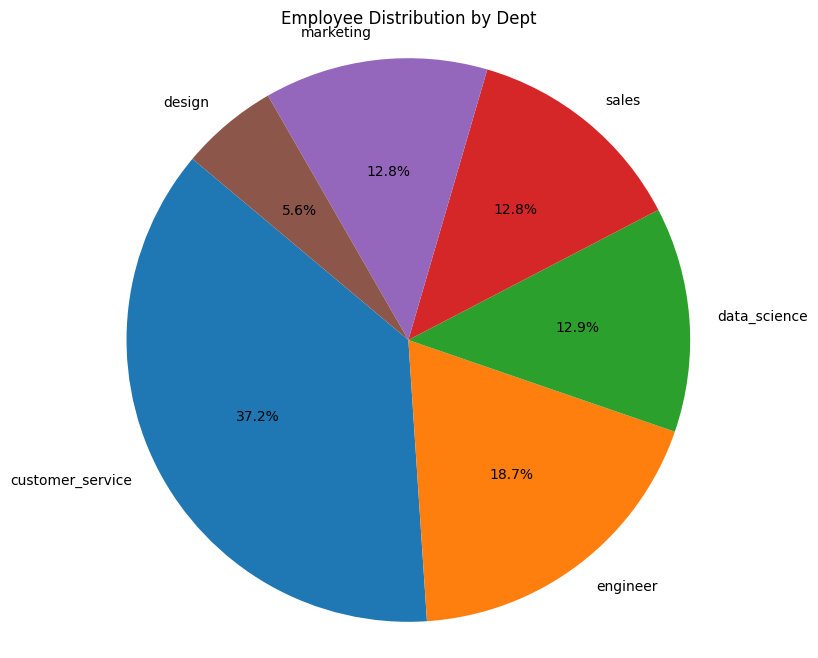

In [11]:
# 统计每个公司员工数量
server_counts = original_data['dept'].value_counts()

# 首先设置图像的大小
plt.figure(figsize = (8, 8))

# 然后设置饼状图的参数
plt.pie(server_counts, labels = server_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Employee Distribution by Dept')
plt.axis('equal')  # 确保饼状图为圆形

# 显示图形
plt.show()

这张图表展示了一个公司内部各部门的员工分布情况，反映出公司的人力资源配置和业务重点。客户服务部门占据了最大比例，为37.2%，表明这个部门在公司中拥有最多的员工资源，这可能意味着客户服务在公司的运营中扮演着核心角色。接下来是工程部门，占18.7%，显示技术或工程支持在公司的日常运作中非常关键。

数据科学部门和销售部门的员工占比接近，分别为12.9%和12.8%，这揭示了公司在数据分析和市场销售两方面的均衡投入。这两个部门的健康比例可能指示公司正在努力利用数据驱动的决策过程，并同时强调市场拓展。最后，设计部门的比例最小，仅为5.6%，这可能表明设计任务在公司中较为有限或集中，或者该部门的工作性质允许较少的员工承担更多的职责。

查看不同公司的不同部门的人数：

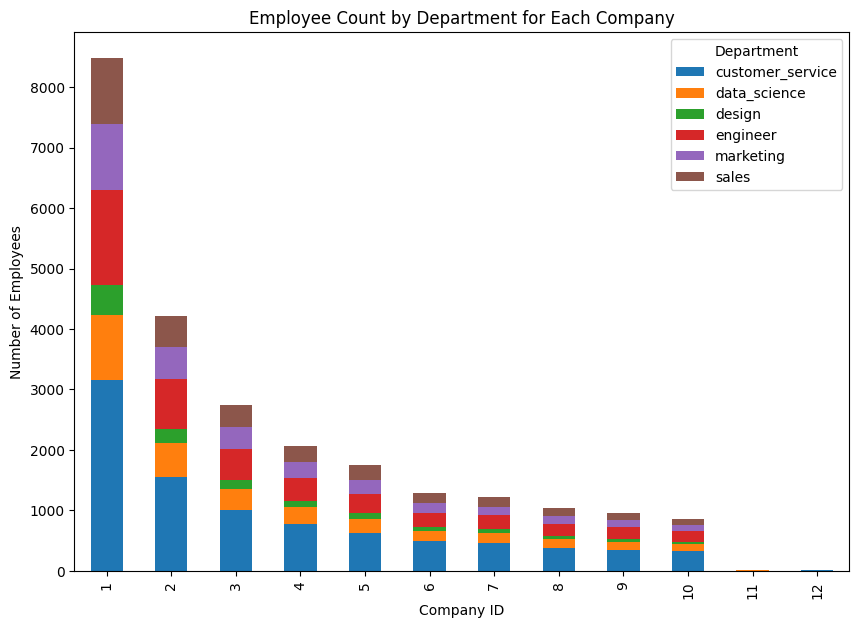

In [12]:
# 按公司和部门统计员工数量
company_dept_counts = original_data.groupby(['company_id', 'dept']).size().unstack(fill_value=0)

# 绘制柱状图
company_dept_counts.plot(kind='bar', stacked=True, figsize=(10, 7))

# 设置图表标题和轴标签
plt.title('Employee Count by Department for Each Company')
plt.xlabel('Company ID')
plt.ylabel('Number of Employees')
plt.legend(title='Department')

# 显示图表
plt.show()

这幅图表显示了12家不同公司各部门的员工数量分布。每家公司都由一组柱状图表示，颜色不同的柱状图代表不同的部门。图中的颜色编码如下：蓝色代表客户服务（customer_service），紫色代表数据科学（data_science），红色代表设计（design），绿色代表工程（engineer），橙色代表市场营销（marketing），和棕色代表销售（sales）。

从图表中可以看出，第1家公司的员工总数最多，且在各个部门都有较高的员工配置，特别是客户服务部门的员工数量显著高于其他部门。相比之下，其他公司的员工数量较少，分布也较为均匀。

第2家至第12家公司的员工数量远低于第1家公司，而且在这些公司中，各部门的员工数量差异不大，显示出较为均衡的部门发展。部分公司如第3家和第7家在数据科学部门的员工数量稍高，可能表明这些公司在数据科学方面有更多的投入。

接着查看总体上的入职工作经验的分布情况：

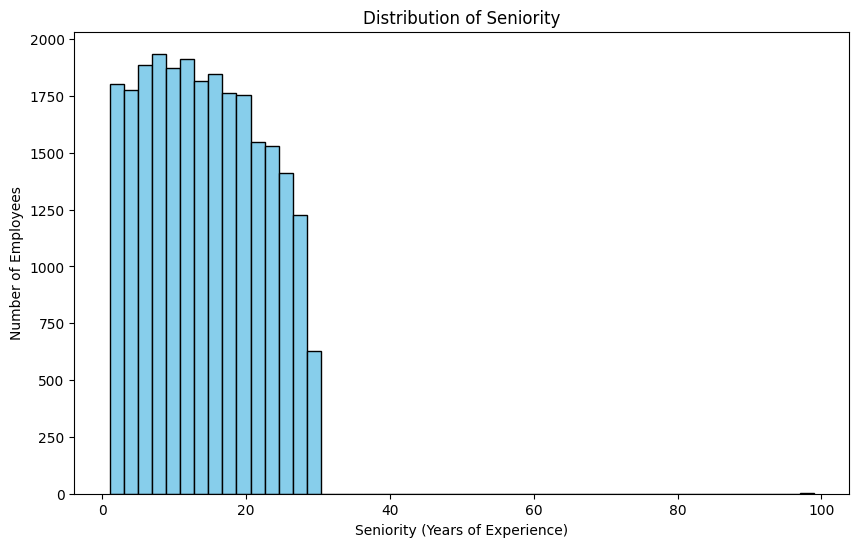

In [13]:
# 绘制seniority的直方图
plt.figure(figsize=(10, 6))
plt.hist(original_data['seniority'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Seniority')
plt.xlabel('Seniority (Years of Experience)')
plt.ylabel('Number of Employees')

# 显示图表
plt.show()

可以发现几乎所有人入职的时候的工作经验都在5~30之间，但是存在着一个值在非常的接近100，可以认为这是一个异常值，可能是录入错误导致的，因为现实中并不会存在着有着将近100年工作经验的人还在求职入职新的工作。

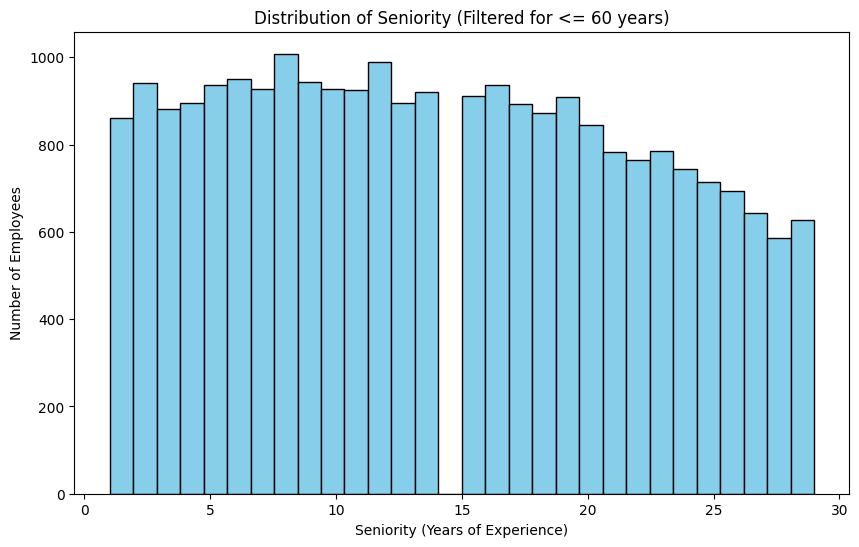

In [14]:
# 过滤掉seniority高于60的值
filtered_data = original_data[original_data['seniority'] <= 60]

# 绘制seniority的直方图
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['seniority'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Seniority (Filtered for <= 60 years)')
plt.xlabel('Seniority (Years of Experience)')
plt.ylabel('Number of Employees')

# 显示图表
plt.show()

在不包括异常值的情况之下，可以发现入职入职时候的工作经验基本上可以分为两个组，一个组在0-14之间，而另外一个组在15-29之间。

0-14工作经验的入职员工的趋势呈现出了略微上升然后下降的趋势，而15-29工作经验的入职员工的趋势呈现出了下降的总体趋势。

In [15]:
# # 过滤掉seniority高于60的值
# filtered_data = original_data[original_data['seniority'] <= 60]

# # 绘制seniority的直方图
# plt.figure(figsize=(10, 6))
# plt.hist(filtered_data['seniority'], bins=20, color='skyblue', edgecolor='black')
# plt.title('Distribution of Seniority (Filtered for <= 60 years)')
# plt.xlabel('Seniority (Years of Experience)')
# plt.ylabel('Number of Employees')

# # 显示图表
# plt.show()

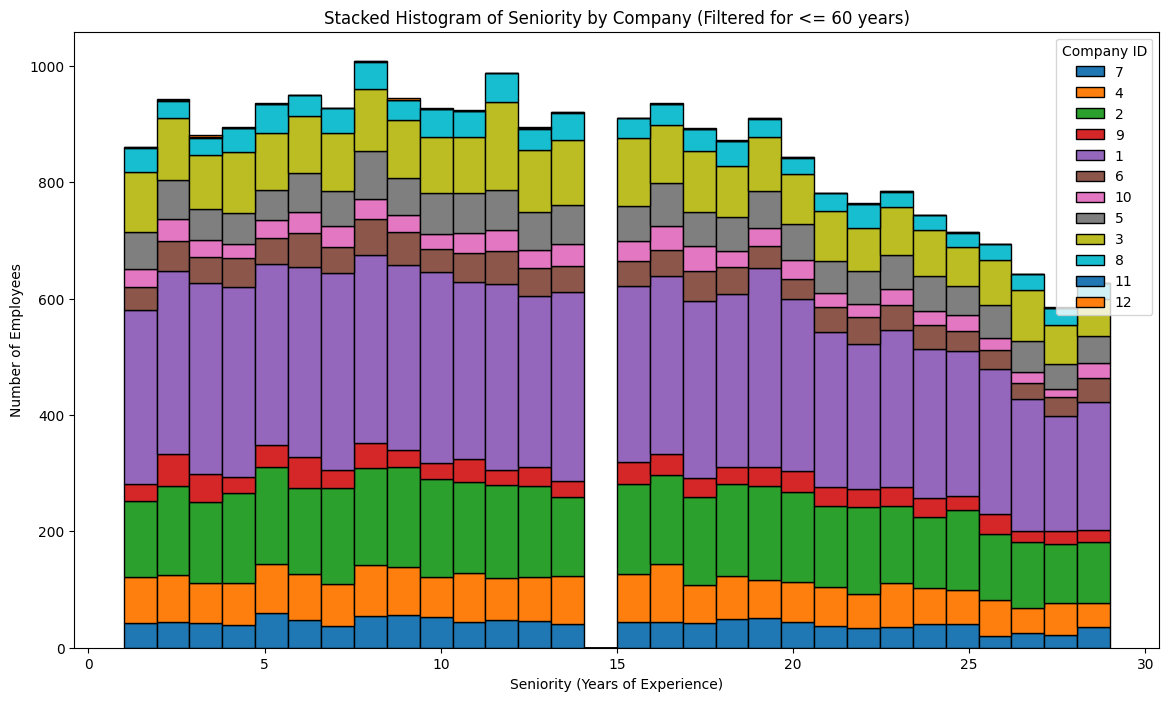

In [16]:
# 过滤掉seniority高于60的值
filtered_data = original_data[original_data['seniority'] <= 60]

# 按company_id分组
companies = filtered_data['company_id'].unique()
company_data = [filtered_data[filtered_data['company_id'] == company]['seniority'] for company in companies]

# 绘制堆叠直方图
plt.figure(figsize=(14, 8))
plt.hist(company_data, bins=30, stacked=True, edgecolor='black', label=companies)
plt.title('Stacked Histogram of Seniority by Company (Filtered for <= 60 years)')
plt.xlabel('Seniority (Years of Experience)')
plt.ylabel('Number of Employees')
plt.legend(title='Company ID')

# 显示图表
plt.show()

这幅堆叠柱状图描绘了12家公司员工的入职时候的工作经验年限分布情况，其中每个柱状图的不同颜色代表不同的公司。从图中可以看出，各公司员工在不同工作经验年限的分布特点及公司之间的差异。

从图表中观察到几个关键点：

1. **新入职员工（0年经验）的分布**：大多数公司在新员工数量上相对均衡，几乎每家公司在此类别中都有显著的员工数量，显示出各公司均在不断吸引新人才。

2. **中间经验层（5-20年）**：随着工作经验年限的增加，员工数量总体呈现下降趋势。这一现象在5年到10年经验的员工中尤为明显，而一些公司在10年以上经验的员工比例开始显著减少，这可能反映了较高经验员工的稀缺性或者职业晋升路径的影响。

3. **高经验员工（20年以上）**：某些公司在这一类别中有相对较多的员工，尤其是在25年和30年经验的部分。这可能表明这些公司对资深员工有良好的保留策略，或者在特定行业中资深经验非常重要。

4. **公司间的差异**：各个公司在员工经验分布上显示出明显差异，一些公司如图中以紫色和灰色表示的公司在多个经验层级均有较高的员工数量，而其他公司则在特定年限有集中的人员配置。

整体上，这幅图表为分析公司的人才结构、员工发展路径以及招聘策略提供了丰富的数据视角。通过对比各公司在不同经验层次的员工分布，可以洞察到各公司的人力资源配置特点及可能的业务重点和文化差异。这些信息对于制定有效的人力资源管理策略和优化组织结构具有实际意义。

接着让我们查看一下年薪的分布情况：

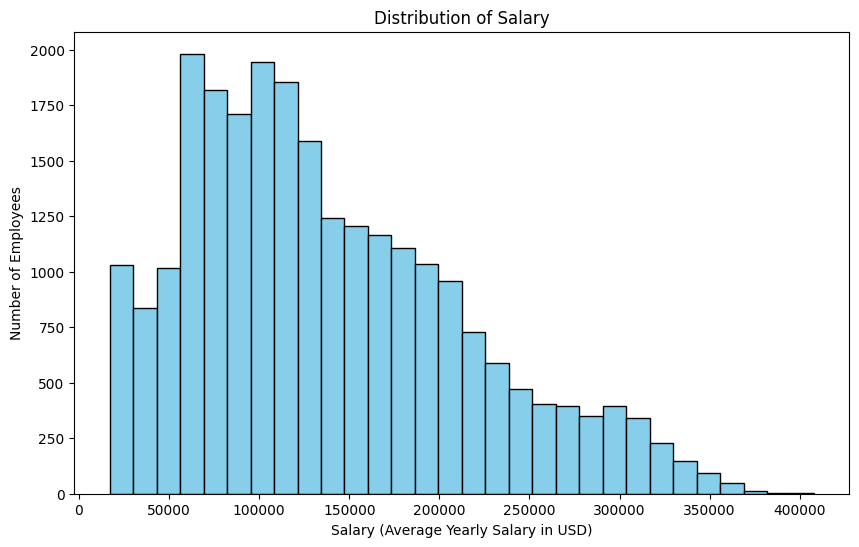

In [17]:
# 绘制salary的直方图
plt.figure(figsize=(10, 6))
plt.hist(original_data['salary'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Salary')
plt.xlabel('Salary (Average Yearly Salary in USD)')
plt.ylabel('Number of Employees')

# 显示图表
plt.show()

员工的薪水分布呈现出了右偏态分布，大部分员工的年薪水在50000到200000之间，并且主要集中在100000上下。

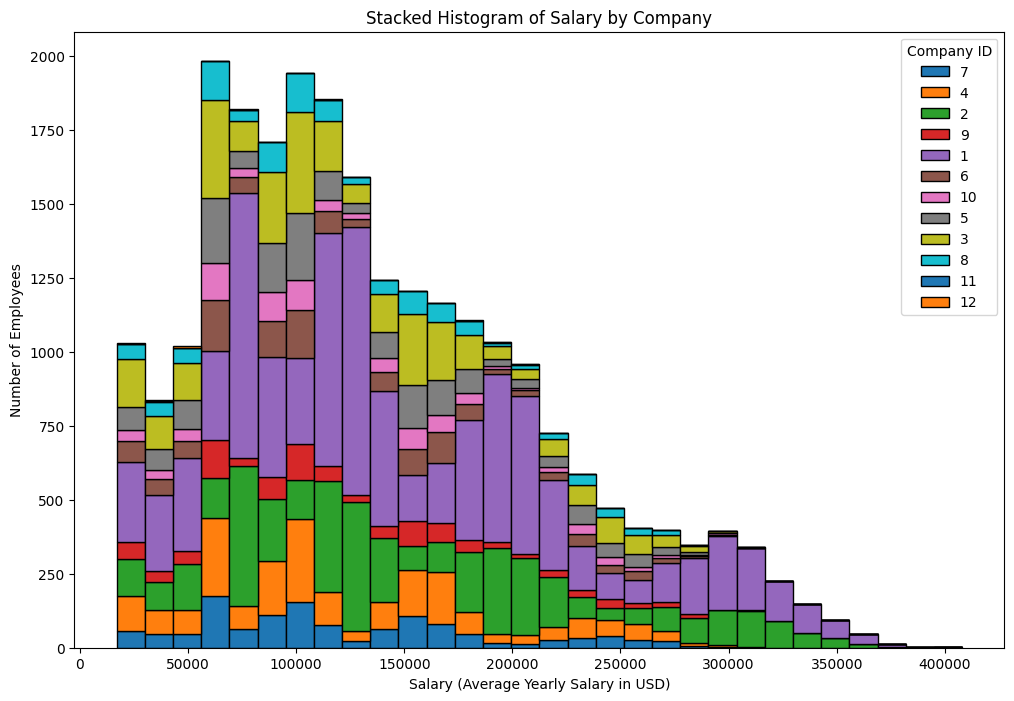

In [18]:
# 按company_id分组数据
companies = original_data['company_id'].unique()
company_salary_data = [original_data[original_data['company_id'] == company]['salary'] for company in companies]

# 绘制堆叠直方图
plt.figure(figsize=(12, 8))
plt.hist(company_salary_data, bins=30, stacked=True, edgecolor='black', label=companies)
plt.title('Stacked Histogram of Salary by Company')
plt.xlabel('Salary (Average Yearly Salary in USD)')
plt.ylabel('Number of Employees')
plt.legend(title='Company ID')

# 显示图表
plt.show()

这幅堆叠柱状图展示了12家不同公司的员工年薪分布情况。每个柱子的不同颜色代表不同的公司，薪资范围从0美元到40万美元。从图中可以观察到各公司薪资结构的差异以及员工薪资的总体分布特点。

1. **薪资分布特点**：大部分员工的年薪集中在5万至15万美元之间。这个区间的柱状图最高，表明大多数员工的薪资处于这个范围。薪资随着增加而员工数量逐渐减少，尤其在20万美元以上的高薪区，员工数量显著下降。

2. **高薪员工分布**：尽管大部分员工薪资较为集中，但在15万至25万美元的薪资区间内，仍然有一定数量的员工，这可能反映了高级管理层或高技能专业人员的薪资水平。30万美元以上的薪资区间内员工数量较少，显示出极高薪资的员工相对稀缺。

3. **公司间薪资差异**：不同公司的员工薪资结构存在明显差异。某些公司在中低薪区间（如5万至10万美元）的员工数量较多，而其他公司则在较高薪资区间（如15万至20万美元）的员工较多，这可能反映了不同公司的行业、地理位置、职位级别和薪酬策略差异。

4. **薪资层级的广泛分布**：整体上，图表显示了薪资从较低到较高的广泛分布，说明参与调查的公司覆盖了从初级职位到高级职位的各种工作类型和职责。

总体而言，这幅图表为分析不同公司的薪资水平提供了清晰的视图，有助于了解各公司在薪资分配上的策略和员工结构。

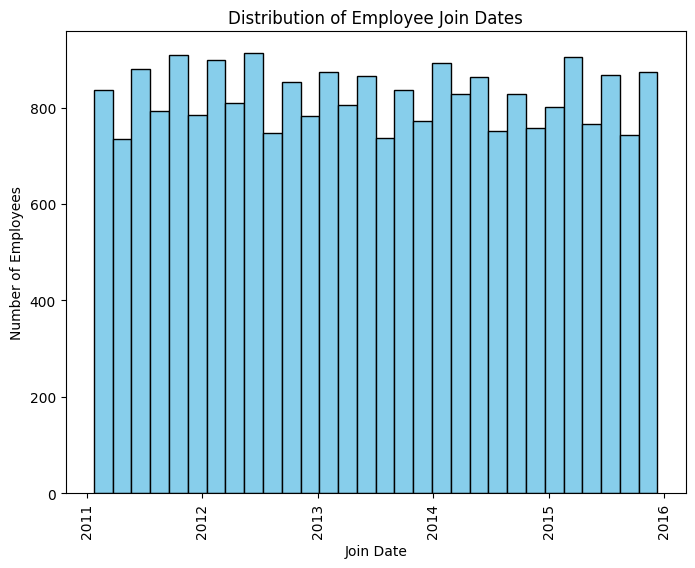

In [19]:
# 将 join_date 转换为日期格式
original_data['join_date'] = pd.to_datetime(original_data['join_date'])

# 绘制 join_date 的直方图
plt.figure(figsize=(8, 6))
plt.hist(original_data['join_date'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Employee Join Dates')
plt.xlabel('Join Date')
plt.ylabel('Number of Employees')

# 旋转横轴的标签
plt.xticks(rotation=90)

# 显示图表
plt.show()

从可视化的结果来看，在年初，年中和年终前后的几个月，入职员工的数量较高，其他的时候则较低。

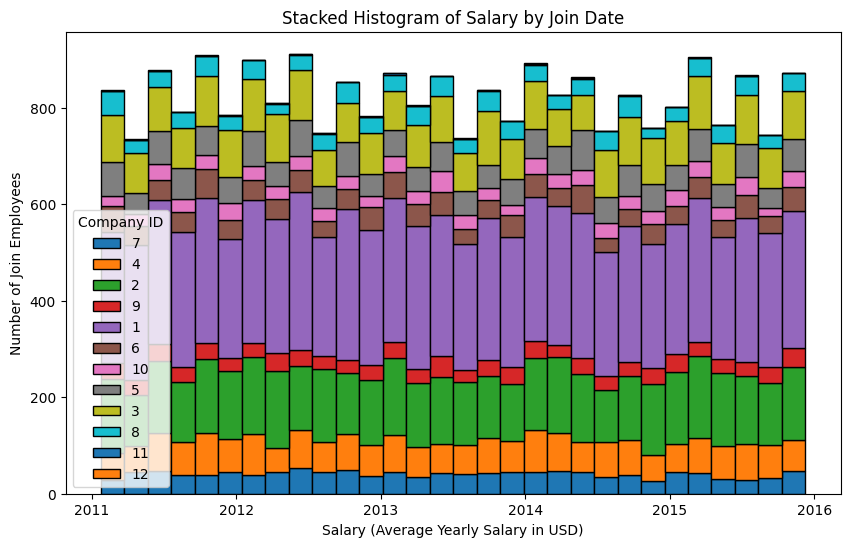

In [20]:
# 按company_id分组数据
companies = original_data['company_id'].unique()
company_join_date_data = [original_data[original_data['company_id'] == company]['join_date'] for company in companies]

# 绘制堆叠直方图
plt.figure(figsize=(10, 6))
plt.hist(company_join_date_data, bins=30, stacked=True, edgecolor='black', label=companies)
plt.title('Stacked Histogram of Salary by Join Date')
plt.xlabel('Salary (Average Yearly Salary in USD)')
plt.ylabel('Number of Join Employees')
plt.legend(title='Company ID')

# 显示图表
plt.show()

各个公司的入职员工人数在时间上的变化趋势和单个公司的员工入职人数在时间上的趋势是趋同的。

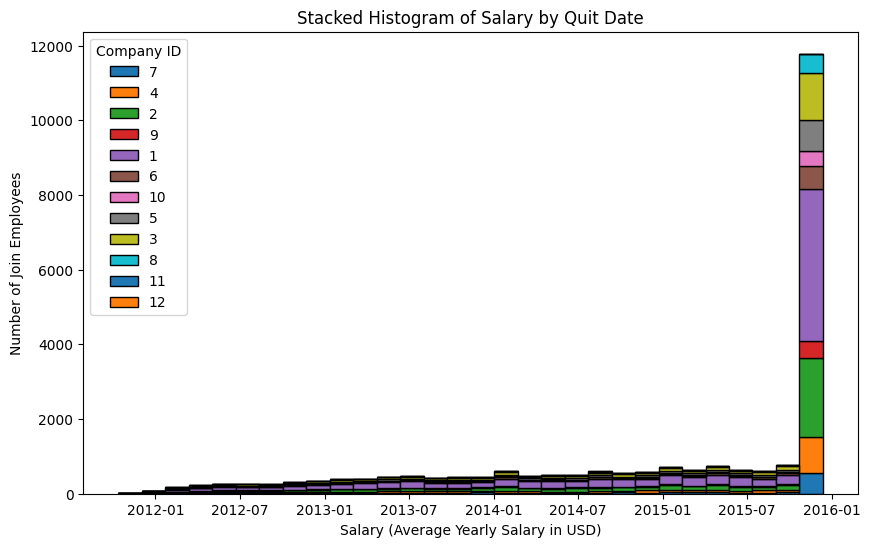

In [21]:
# 按company_id分组数据
companies = original_data['company_id'].unique()
company_quit_date_data = [original_data[original_data['company_id'] == company]['quit_date'] for company in companies]

# 绘制堆叠直方图
plt.figure(figsize=(10, 6))
plt.hist(company_quit_date_data, bins=30, stacked=True, edgecolor='black', label=companies)
plt.title('Stacked Histogram of Salary by Quit Date')
plt.xlabel('Salary (Average Yearly Salary in USD)')
plt.ylabel('Number of Join Employees')
plt.legend(title='Company ID')

# 显示图表
plt.show()

可以发现存在着一个异常高的日期，但是这个日期是因为数据集收集的时候，当时员工还没有离职所记录的，而不是事实上的离职日期，所以需要去除掉这个值。

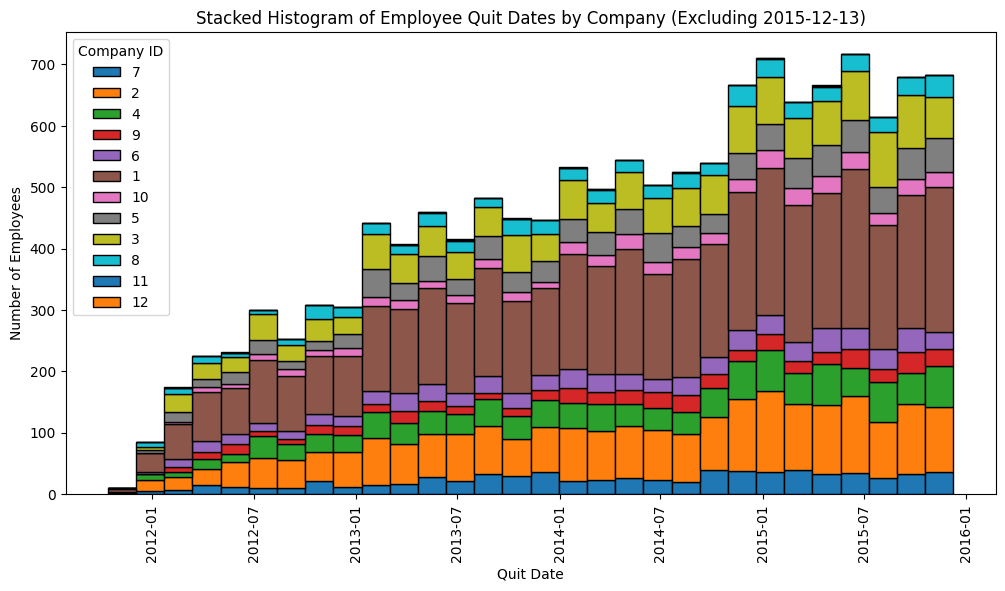

In [22]:
# 将 quit_date 转换为日期格式，忽略 NA 值
original_data['quit_date'] = pd.to_datetime(original_data['quit_date'], errors='coerce')

# 过滤掉 quit_date 为 2015-12-13 的记录
filtered_data = original_data[original_data['quit_date'] != '2015-12-13']

# 获取所有唯一的公司 ID
companies = filtered_data['company_id'].unique()

# 按公司分组的 quit_date 数据
company_quit_dates = [filtered_data[filtered_data['company_id'] == company]['quit_date'].dropna() for company in companies]

# 绘制堆叠直方图
plt.figure(figsize=(12, 6))
plt.hist(company_quit_dates, bins=30, stacked=True, edgecolor='black', label=companies)
plt.title('Stacked Histogram of Employee Quit Dates by Company (Excluding 2015-12-13)')
plt.xlabel('Quit Date')
plt.ylabel('Number of Employees')
plt.legend(title='Company ID')

# 旋转横轴的标签
plt.xticks(rotation=90)

# 显示图表
plt.show()

这幅堆叠柱状图展示了从2012年1月至2016年1月期间，12家公司员工的离职日期分布。每种颜色代表不同的公司，各柱子的高度表示特定时间点离职的员工数量。

1. **离职趋势**：整体上，所有公司的离职员工数量随时间逐渐增加。这可能与公司规模的扩大或行业状况的变化有关。尤其是从2014年开始，各公司的离职员工数量显著增多。

2. **公司间差异**：各公司离职员工的数量存在明显差异。某些公司（如图中的灰色和黄色代表的公司）在某些时间点的离职人数远高于其他公司，这可能反映了公司内部的工作环境、职业发展机会、薪资福利政策等因素的差异。

3. **离职高峰**：特别是在2014年和2015年，大多数公司的离职人数达到高峰，这可能与经济周期、行业趋势或季节性因素（如年底评估后的离职）有关。

4. **季节性模式**：每年的1月和7月，多数公司的离职人数似乎较高，这可能说明员工倾向于在年初或中年进行职业变动。

总体来看，这幅图表为分析不同公司员工流动趋势提供了详细的视图，有助于了解员工留存和离职的周期性及公司间的差异。这些信息对于人力资源部门在评估和改善员工保留策略中尤为重要。

# 影响因素探索

我们的目标是分析哪些因素对离职率存在着重要的影响，我们需要对数据集进行额外的处理，从而形成新的变量或者新的数据集。

In [23]:
original_data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,tenure_days
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340
2,927315.0,4,marketing,14,101000.0,2014-10-13,2015-12-13,426
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040


基于数据集的信息，我们可以知道：公司在2011年1月23日的时候的总员工人数为0。

首先，我们创建一个新的特征变量，用来标记员工是否已经离职：

In [24]:
original_data['quit_date'] = pd.to_datetime(original_data['quit_date'], errors='coerce')

# 创建is_quit列
original_data['is_quit'] = (original_data['quit_date'] != pd.Timestamp('2015-12-13')).astype(int)

In [25]:
original_data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,tenure_days,is_quit
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585,1
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340,1
2,927315.0,4,marketing,14,101000.0,2014-10-13,2015-12-13,426,0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389,1
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040,1


而employee这个特征是没有任何作用的，所以我们将其删除：

In [26]:
original_data = original_data.drop('employee_id', axis = 1)

接着使用quit_date来生成三个特征：year, month和day：

In [27]:
original_data['quit_year'] = original_data['quit_date'].dt.year
original_data['quit_month'] = original_data['quit_date'].dt.month
original_data['quit_day'] = original_data['quit_date'].dt.day

在这之后删除掉quit_date这个特征：

In [28]:
original_data = original_data.drop('quit_date', axis=1)

而join_date这个特征已经被用来生成了tenure_days特征，所以可以直接删除了：

In [29]:
original_data = original_data.drop('join_date', axis = 1)

查看现在的数据集的特征：

In [30]:
original_data.head()

,company_id,dept,seniority,salary,tenure_days,is_quit,quit_year,quit_month,quit_day
0,7,customer_service,28,89000.0,585,1,2015,10,30
1,7,marketing,20,183000.0,340,1,2014,4,4
2,4,marketing,14,101000.0,426,0,2015,12,13
3,7,customer_service,20,115000.0,389,1,2013,6,7
4,2,data_science,23,276000.0,1040,1,2014,8,22


接着我们可以查看哪些因素对是否离职存在着影响了。

In [31]:
# 筛选已离职的员工记录
quit_data = original_data[original_data['is_quit'] == 1]

首先查看不同年份的离职人数情况:

In [32]:
# 按离职年份分组并计数
quit_year_counts = quit_data['quit_year'].value_counts().sort_index()

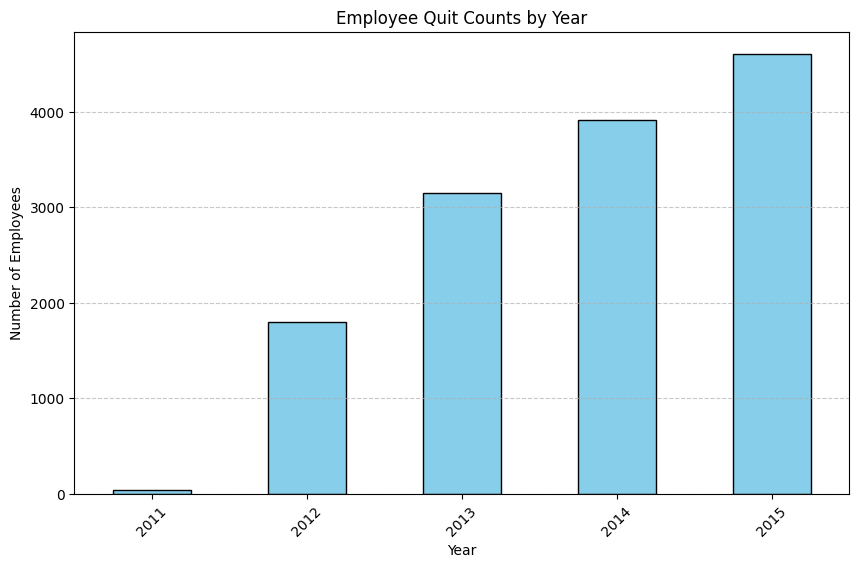

In [33]:
# 创建柱状图
plt.figure(figsize=(10, 6))  # 设置图形大小
quit_year_counts.plot(kind='bar', color='skyblue', edgecolor='black')  # 选择柱状图，并设置颜色
plt.title('Employee Quit Counts by Year')  # 添加标题
plt.xlabel('Year')  # 添加x轴标签
plt.ylabel('Number of Employees')  # 添加y轴标签
plt.xticks(rotation=45)  # 旋转x轴标签，以便更好地显示
plt.grid(axis='y', linestyle='--', alpha=0.7)  # 添加y轴网格线，提高可读性
plt.show()  # 显示图形

可以发现，年份越大，离职的人数越多。

然后是不同月份的离职人数情况:

In [34]:
# 按离职年份分组并计数
quit_month_counts = quit_data['quit_month'].value_counts().sort_index()

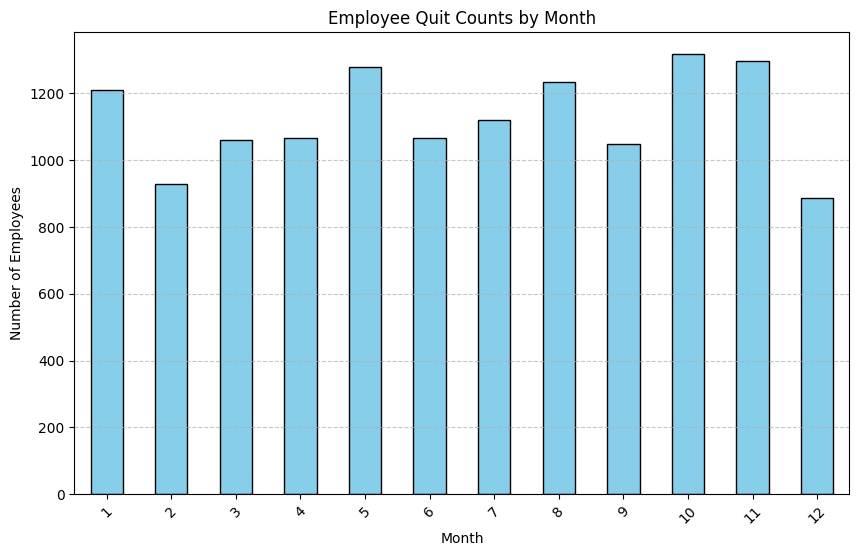

In [35]:
# 创建柱状图
plt.figure(figsize=(10, 6))  # 设置图形大小
quit_month_counts.plot(kind='bar', color='skyblue', edgecolor='black')  # 选择柱状图，并设置颜色
plt.title('Employee Quit Counts by Month')  # 添加标题
plt.xlabel('Month')  # 添加x轴标签
plt.ylabel('Number of Employees')  # 添加y轴标签
plt.xticks(rotation=45)  # 旋转x轴标签，以便更好地显示
plt.grid(axis='y', linestyle='--', alpha=0.7)  # 添加y轴网格线，提高可读性
plt.show()  # 显示图形

可以发现，在一月份和五月份和八月和十月和十一月份的时候，离职人数升高，而其他的月份离职人数都降低，这可能和奖金或者是招聘有关。

但是总的来讲，离职呈现出了季节性。

接着我们可以查看每个月内部的离职分布情况:

In [36]:
# 按离职年份分组并计数
quit_day_counts = quit_data['quit_day'].value_counts().sort_index()

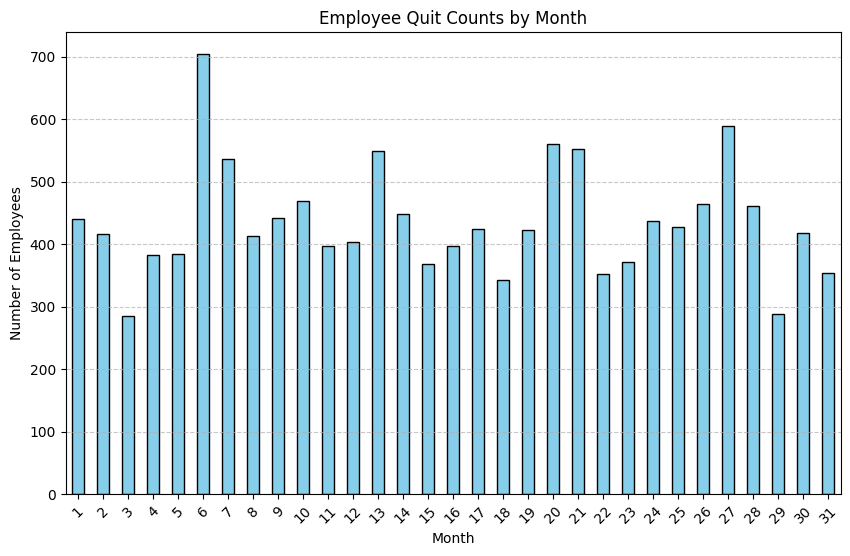

In [37]:
# 创建柱状图
plt.figure(figsize=(10, 6))  # 设置图形大小
quit_day_counts.plot(kind='bar', color='skyblue', edgecolor='black')  # 选择柱状图，并设置颜色
plt.title('Employee Quit Counts by Month')  # 添加标题
plt.xlabel('Month')  # 添加x轴标签
plt.ylabel('Number of Employees')  # 添加y轴标签
plt.xticks(rotation=45)  # 旋转x轴标签，以便更好地显示
plt.grid(axis='y', linestyle='--', alpha=0.7)  # 添加y轴网格线，提高可读性
plt.show()  # 显示图形

从可视化的结果可以发现，每个月的离职的高峰在6号，13号，20-21号，27号，其他的时候离职人数相对较低。

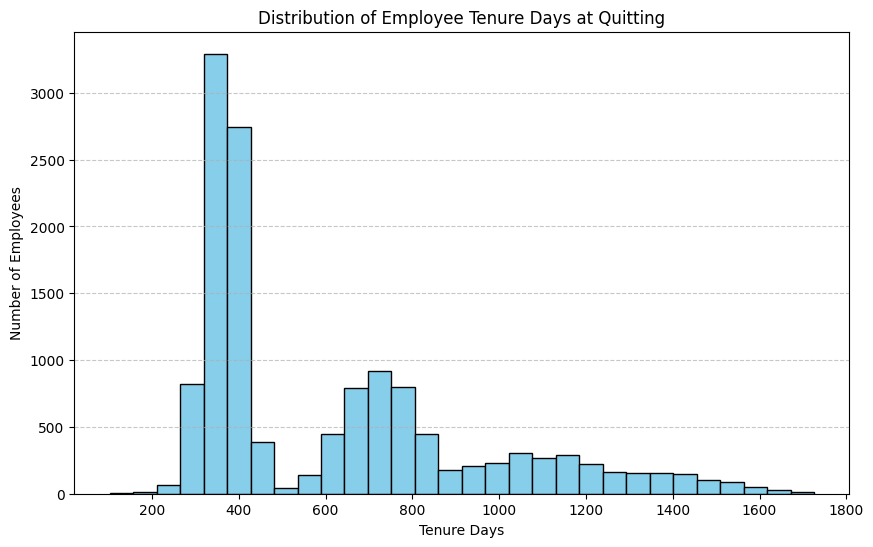

In [38]:
# 创建直方图
plt.figure(figsize=(10, 6))  # 设置图形大小
quit_data['tenure_days'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')  # 选择直方图，并设置颜色和边框颜色
plt.title('Distribution of Employee Tenure Days at Quitting')  # 添加标题
plt.xlabel('Tenure Days')  # 添加x轴标签
plt.ylabel('Number of Employees')  # 添加y轴标签
plt.grid(axis='y', linestyle='--', alpha=0.7)  # 添加y轴网格线，提高可读性
plt.show()  # 显示图形

从上图可以发现，当日志工作达到了接近400天的时候，离职率达到了高峰，并且远远的高于了其他时间，另外一个较小的高分在700天前后。

这是可以解释的，入职一段时间之后的人可能发现他们并不存在着上升空间，而另外一批上升的人在继续工作了一段时间之后，可能发现上升空间游戏，所以这批人选择了离职。

由此我们也可以得出结论：离职人数和入职发展天数存在着一定的关联.

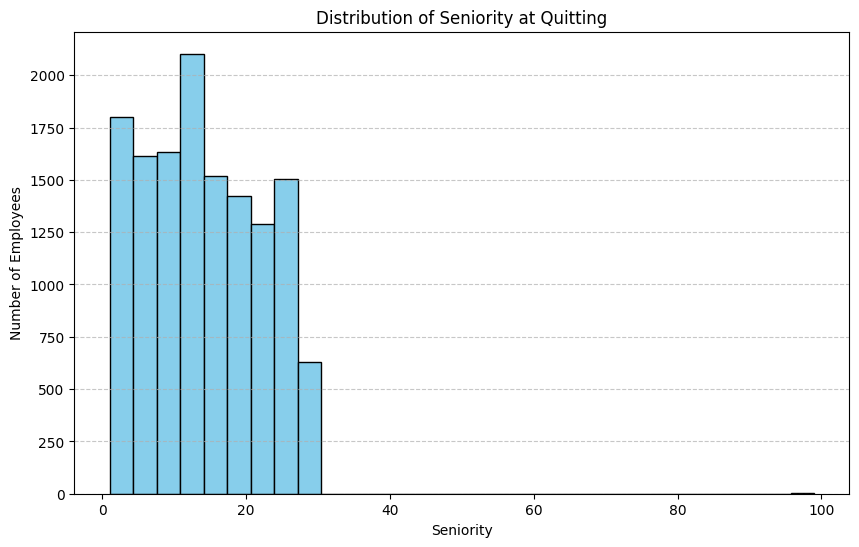

In [39]:
# 创建直方图
plt.figure(figsize=(10, 6))  # 设置图形大小
quit_data['seniority'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')  # 选择直方图，并设置颜色和边框颜色
plt.title('Distribution of Seniority at Quitting')  # 添加标题
plt.xlabel('Seniority')  # 添加x轴标签
plt.ylabel('Number of Employees')  # 添加y轴标签
plt.grid(axis='y', linestyle='--', alpha=0.7)  # 添加y轴网格线，提高可读性
plt.show()  # 显示图形

离职员工的入职时候的工作经验和总体分布呈现出高度一致，因此可以认为该特征和是否离职并不呈现出正相关。

In [40]:
# 计算每个部门的员工数量
department_counts = original_data['dept'].value_counts()

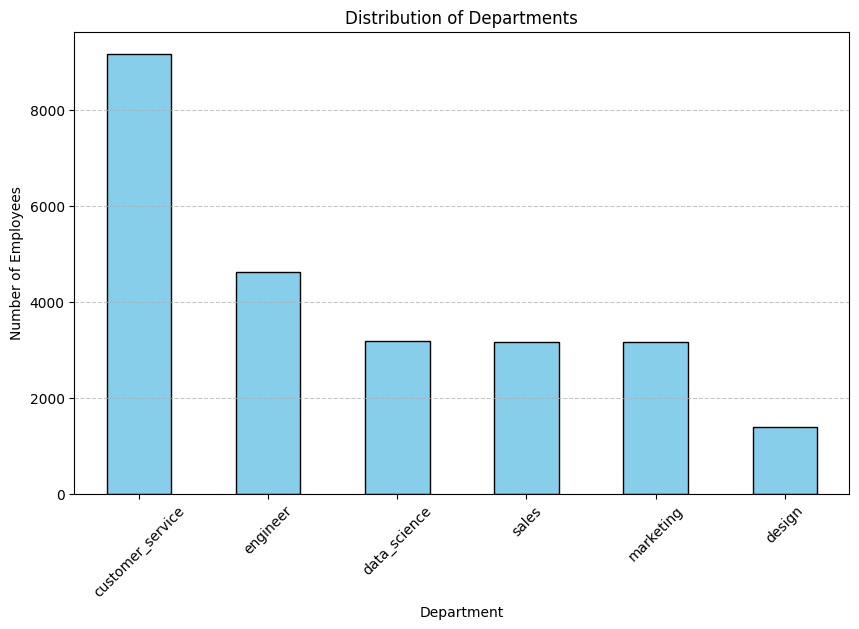

In [41]:
# 创建柱状图
plt.figure(figsize=(10, 6))  # 设置图形大小
department_counts.plot(kind='bar', color='skyblue', edgecolor='black')  # 选择柱状图，并设置颜色和边框颜色
plt.title('Distribution of Departments')  # 添加标题
plt.xlabel('Department')  # 添加x轴标签
plt.ylabel('Number of Employees')  # 添加y轴标签
plt.grid(axis='y', linestyle='--', alpha=0.7)  # 添加y轴网格线，提高可读性
plt.xticks(rotation=45)  # 旋转x轴标签，以便更好地显示部门名称
plt.show()  # 显示图形

从可视化的结果可以认为，离职人数和公司部门呈现出了较高的相关性，customer service部分的离职人数远高于了其他部门，而design部门的离职人数最低。

In [42]:
# 计算每个部门的员工数量
company_counts = quit_data['company_id'].value_counts()

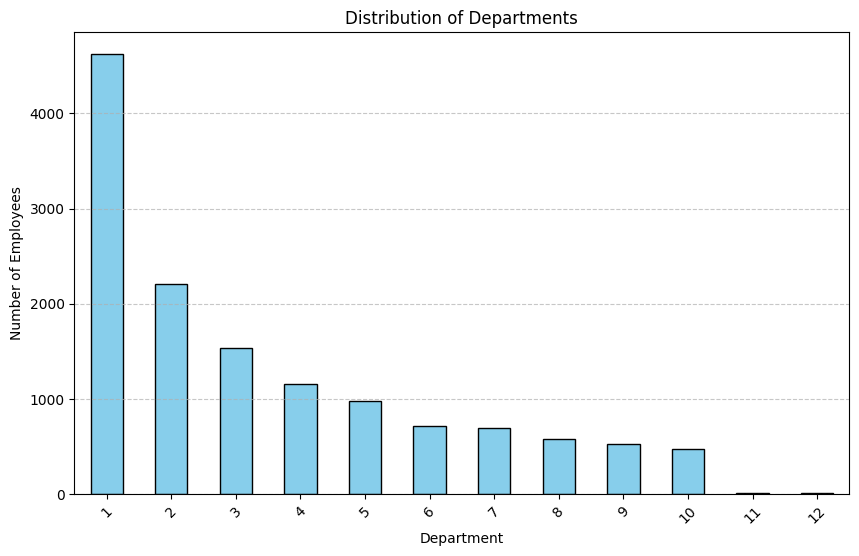

In [43]:
# 创建柱状图
plt.figure(figsize=(10, 6))  # 设置图形大小
company_counts.plot(kind='bar', color='skyblue', edgecolor='black')  # 选择柱状图，并设置颜色和边框颜色
plt.title('Distribution of Departments')  # 添加标题
plt.xlabel('Department')  # 添加x轴标签
plt.ylabel('Number of Employees')  # 添加y轴标签
plt.grid(axis='y', linestyle='--', alpha=0.7)  # 添加y轴网格线，提高可读性
plt.xticks(rotation=45)  # 旋转x轴标签，以便更好地显示部门名称
plt.show()  # 显示图形

可视化的结果指出，公司1的离职人数最高，然后不断的呈现出下降的趋势。

In [44]:
# 筛选已离职员工的薪资数据
quit_salary_data = original_data[original_data['is_quit'] == 1]['salary']

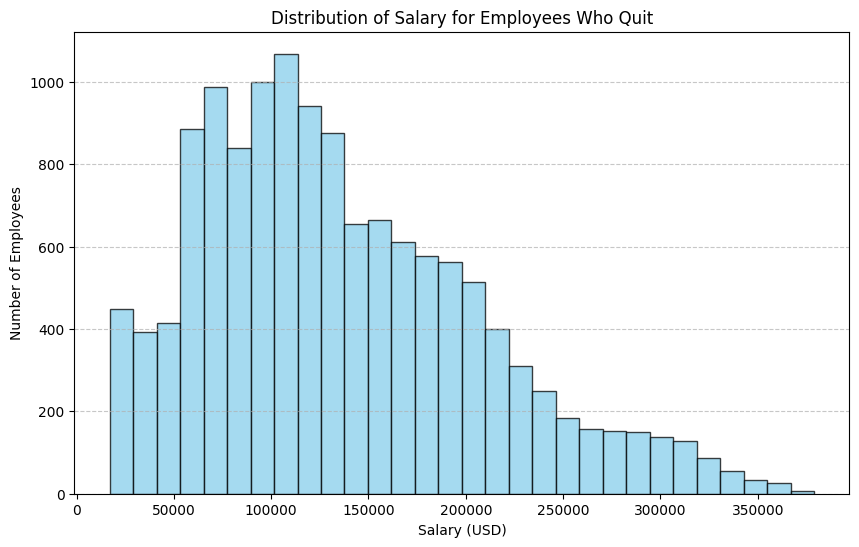

In [45]:
# 创建直方图
plt.figure(figsize=(10, 6))  # 设置图形大小
quit_salary_data.plot(kind='hist', bins=30, color='skyblue', edgecolor='black', alpha=0.75)  # 选择直方图，并设置颜色和边框颜色
plt.title('Distribution of Salary for Employees Who Quit')  # 添加标题
plt.xlabel('Salary (USD)')  # 添加x轴标签
plt.ylabel('Number of Employees')  # 添加y轴标签
plt.grid(axis='y', linestyle='--', alpha=0.7)  # 添加y轴网格线，提高可读性
plt.show()  # 显示图形

可以发现离职员工的薪水呈现出接近正态分布的分布情况。

# 使用模型来分析

使用决策树模型:

In [46]:
original_data.columns

Index(['company_id', 'dept', 'seniority', 'salary', 'tenure_days', 'is_quit',
       'quit_year', 'quit_month', 'quit_day'],
      dtype='object')

In [47]:
# 假设original_data是已加载的DataFrame
# 对分类特征进行编码
le = LabelEncoder()
original_data['dept'] = le.fit_transform(original_data['dept'])

# 分离特征和目标变量
X = original_data[['company_id', 'dept', 'seniority', 'salary', 'tenure_days', 'quit_year', 'quit_month', 'quit_day']]
y = original_data['is_quit']

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

训练模型:

In [48]:
# 创建随机森林模型
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

计算特征的重要性：

In [49]:
# 获取特征重要性
importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print(importance_df)

       Feature  Importance
6   quit_month    0.446037
7     quit_day    0.249812
5    quit_year    0.245280
4  tenure_days    0.054526
3       salary    0.002579
2    seniority    0.000919
0   company_id    0.000529
1         dept    0.000318


进行可视化：

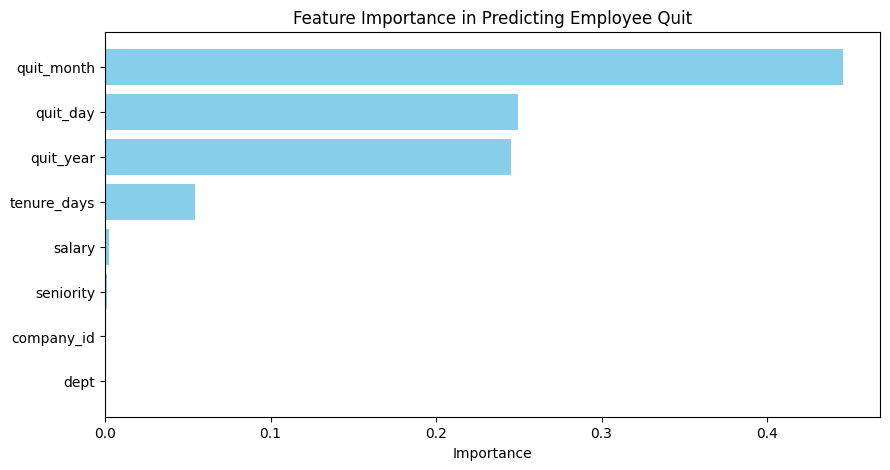

In [50]:
# 绘制特征重要性
plt.figure(figsize=(10, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Predicting Employee Quit')
plt.gca().invert_yaxis()  # 反转y轴，使重要特征在顶部
plt.show()

从结果可以发现：离职的时间呈现出了较大的影响，其次是tenure days，salary也存在着影响但是比较小。